In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [98]:
dataset = pd.read_csv('train.csv')

In [99]:
dataset.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [100]:
fig = px.pie(dataset, names= "Label", hole=0.4)
fig.show()

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [102]:
print(dataset.isnull().sum())


TweetId      0
Label        0
TweetText    0
dtype: int64


# Data Preprocessing:

### 1-Clean the text data by removing noise such as URLs, special characters, punctuation, and emojis.?



In [103]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    
    # Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    return text



In [104]:
dataset['TweetText']

0       '#SecKerry: The value of the @StateDept and @U...
1                                 '@rraina1481 I fear so'
2       'Watch video highlights of the #wwc13 final be...
3       'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4       '@cricketfox Always a good thing. Thanks for t...
                              ...                        
6520    'Photo: PM has laid a wreath at Martyrs Monume...
6521    'The secret of the Chennai pitch - crumbling o...
6522              @alinabhutto he isn't on Twitter either
6523    'Which England player would you take out to di...
6524    'Dmitry #Medvedev expressed condolences to the...
Name: TweetText, Length: 6525, dtype: object

In [105]:
dataset['cleanText'] = dataset['TweetText'].apply(clean_text)

In [106]:
dataset['cleanText']

0       SecKerry The value of the StateDept and USAID ...
1                                    rraina1481 I fear so
2       Watch video highlights of the wwc13 final betw...
3       RT chelscanlan At Nitro Circus at AlbertPark  ...
4       cricketfox Always a good thing Thanks for the ...
                              ...                        
6520    Photo PM has laid a wreath at Martyrs Monument...
6521    The secret of the Chennai pitch  crumbling on ...
6522                alinabhutto he isnt on Twitter either
6523    Which England player would you take out to din...
6524    Dmitry Medvedev expressed condolences to the f...
Name: cleanText, Length: 6525, dtype: object

### 2-Tokenize the text into words or phrases.

In [107]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data if not already downloaded
nltk.download('punkt')

# Tokenize function
def tokenize_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    return tokens





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [108]:
dataset['Tokenized_Text'] = dataset['cleanText'].apply(tokenize_text)


In [109]:
dataset['Tokenized_Text'][0]

['SecKerry',
 'The',
 'value',
 'of',
 'the',
 'StateDept',
 'and',
 'USAID',
 'is',
 'measured',
 'not',
 'in',
 'dollars',
 'but',
 'in',
 'terms',
 'of',
 'our',
 'deepest',
 'American',
 'values']

### 3-Normalize the text by converting it to lowercase and removing stop words (commonly occurring words like "and", "the", "is", etc.).

In [110]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# normalize function
def normalize_text(tokens):
    return [word.lower() for word in tokens if word.lower() not in stop_words]



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
dataset['Normalized_Text'] = dataset['Tokenized_Text'].apply(normalize_text)


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TweetId          6525 non-null   int64 
 1   Label            6525 non-null   object
 2   TweetText        6525 non-null   object
 3   cleanText        6525 non-null   object
 4   Tokenized_Text   6525 non-null   object
 5   Normalized_Text  6525 non-null   object
dtypes: int64(1), object(5)
memory usage: 306.0+ KB


In [113]:
dataset['Normalized_Text'][0]

['seckerry',
 'value',
 'statedept',
 'usaid',
 'measured',
 'dollars',
 'terms',
 'deepest',
 'american',
 'values']

# Feature Extraction:

Convert the text data into numerical features that can be used by machine learning algorithms.

In [114]:
dataset['Normalized_Text_String'] = dataset['Normalized_Text'].apply(lambda x: ' '.join(x))


In [115]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create a CountVectorizer instance for BoW
count_vectorizer = CountVectorizer()
dataset['Normalized_Text_String'] = dataset['Normalized_Text'].apply(lambda x: ' '.join(x))

# Fit and transform the 'Normalized_Text' column to create BoW features
bow_features = count_vectorizer.fit_transform(dataset['Normalized_Text_String'])

# Create a TfidfVectorizer instance for TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Normalized_Text' column to create TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(dataset['Normalized_Text_String'])



In [116]:
dataset.head()

,TweetId,Label,TweetText,cleanText,Tokenized_Text,Normalized_Text,Normalized_Text_String
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,SecKerry The value of the StateDept and USAID ...,"[SecKerry, The, value, of, the, StateDept, and...","[seckerry, value, statedept, usaid, measured, ...",seckerry value statedept usaid measured dollar...
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina1481 I fear so,"[rraina1481, I, fear, so]","[rraina1481, fear]",rraina1481 fear
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,Watch video highlights of the wwc13 final betw...,"[Watch, video, highlights, of, the, wwc13, fin...","[watch, video, highlights, wwc13, final, austr...",watch video highlights wwc13 final australia w...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,RT chelscanlan At Nitro Circus at AlbertPark ...,"[RT, chelscanlan, At, Nitro, Circus, at, Alber...","[rt, chelscanlan, nitro, circus, albertpark, t...",rt chelscanlan nitro circus albertpark theymak...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox Always a good thing Thanks for the ...,"[cricketfox, Always, a, good, thing, Thanks, f...","[cricketfox, always, good, thing, thanks, feed...",cricketfox always good thing thanks feedback


# Model Training and Evaluation

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, dataset['Label'], test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)




MultinomialNB()

In [118]:
# Predict labels for the testing set
y_pred = nb_classifier.predict(X_test)



In [119]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9624521072796934


In [120]:
# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Politics       0.96      0.96      0.96       638
      Sports       0.96      0.96      0.96       667

    accuracy                           0.96      1305
   macro avg       0.96      0.96      0.96      1305
weighted avg       0.96      0.96      0.96      1305



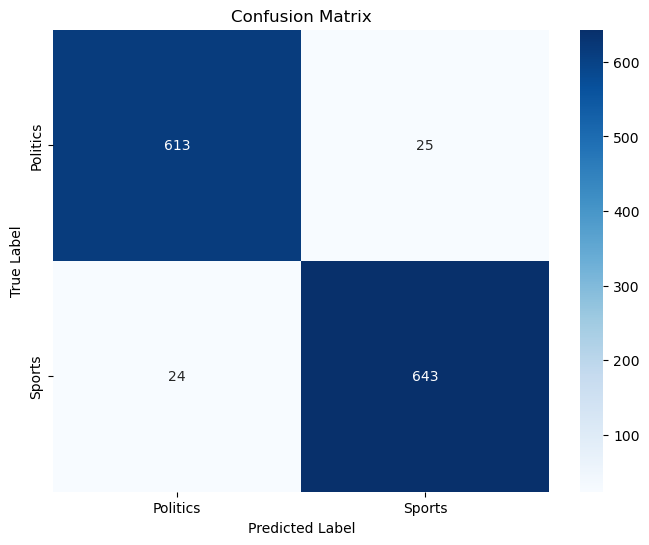

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [144]:
# Sample test tweet
sample_tweet = "I'm watching the football game tonight."

# Clean, tokenize, and normalize the sample tweet
cleaned_sample_tweet = clean_text(sample_tweet)
tokenized_sample_tweet = tokenize_text(cleaned_sample_tweet)
normalized_sample_tweet = normalize_text(tokenized_sample_tweet)

# Convert the normalized sample tweet into BoW features
bow_features_sample = count_vectorizer.transform([' '.join(normalized_sample_tweet)])

# Predict label for the sample tweet
predicted_label_sample = nb_classifier.predict(bow_features_sample)
print("Predicted Label for Sample Tweet:", predicted_label_sample[0])


Predicted Label for Sample Tweet: Sports


In [157]:
import joblib

# Save the trained model for future use
joblib.dump(nb_classifier, 'tweet_classifier_model.joblib')
joblib.dump(count_vectorizer.vocabulary_, 'count_vectorizer_vocabulary.joblib')



['count_vectorizer_vocabulary.joblib']

In [152]:
# Load the saved model
loaded_model = joblib.load('tweet_classifier_model.joblib')



In [156]:
# Sample test tweet
sample_tweet = "I'm watching the football game tonight."

# Clean, tokenize, and normalize the sample tweet
cleaned_sample_tweet = clean_text(sample_tweet)
tokenized_sample_tweet = tokenize_text(cleaned_sample_tweet)
normalized_sample_tweet = normalize_text(tokenized_sample_tweet)

# Convert the normalized sample tweet into BoW features
bow_features_sample = count_vectorizer.transform([' '.join(normalized_sample_tweet)])

# Predict label for the sample tweet
predicted_label_sample = loaded_model.predict(bow_features_sample)
print("Predicted Label for Sample Tweet:", predicted_label_sample[0])

Predicted Label for Sample Tweet: Sports


In [153]:
new_tweet = pd.read_csv('test.csv')


In [155]:
# Apply text preprocessing to the 'TweetText' column
new_tweet['Cleaned_Text'] = new_tweet['TweetText'].apply(clean_text)
new_tweet['Tokenized_Text'] = new_tweet['Cleaned_Text'].apply(tokenize_text)
new_tweet['Normalized_Text'] = new_tweet['Tokenized_Text'].apply(normalize_text)

# Convert the normalized new tweet into BoW features
bow_features_new = count_vectorizer.transform(new_tweet['Normalized_Text'].apply(lambda x: ' '.join(x)))

# Predict label for the new tweets
predicted_labels = loaded_model.predict(bow_features_new)
print("Predicted Labels:", predicted_labels)

Predicted Labels: ['Sports' 'Sports' 'Politics' ... 'Sports' 'Politics' 'Politics']
